In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


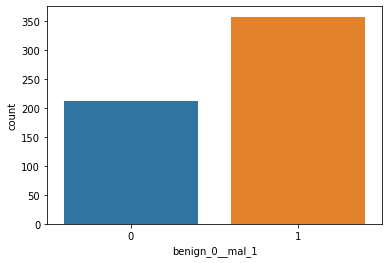

In [6]:
sns.countplot(x='benign_0__mal_1', data = df)

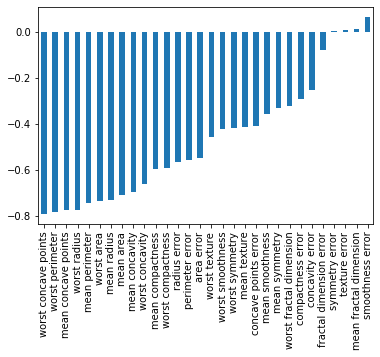

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

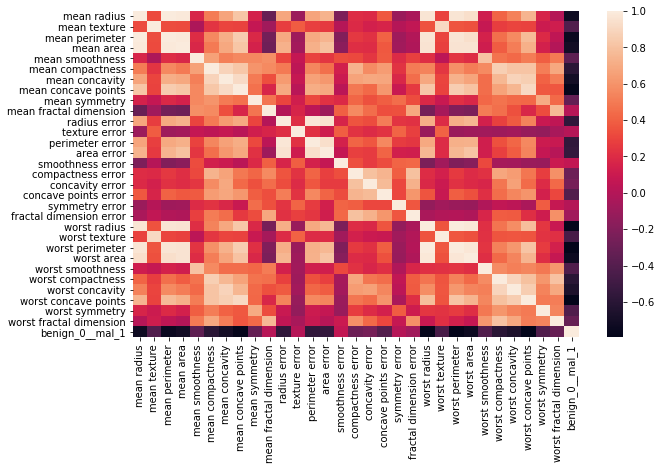

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

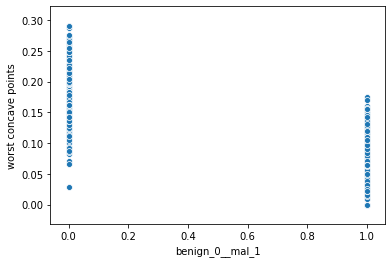

In [21]:
sns.scatterplot(x = 'benign_0__mal_1', y ='worst concave points', data = df)

In [26]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

In [38]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense, Dropout

In [41]:
X_train.shape

(426, 30)

In [43]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [44]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 8ms/sample - loss: 0.6780 - val_loss: 0.6649
Epoch 2/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6547 - val_loss: 0.6443
Epoch 3/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6343 - val_loss: 0.6222
Epoch 4/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6099 - val_loss: 0.5949
Epoch 5/600
426/426 [==============================] - 0s 106us/sample - loss: 0.5800 - val_loss: 0.5596
Epoch 6/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5418 - val_loss: 0.5162
Epoch 7/600
426/426 [==============================] - 0s 101us/sample - loss: 0.5030 - val_loss: 0.4714
Epoch 8/600
426/426 [==============================] - 0s 108us/sample - loss: 0.4560 - val_loss: 0.4232
Epoch 9/600
426/426 [==============================] - 0s 106us/sample - loss: 0.4106 - val_loss: 0.3814
Epoch 10/60

426/426 [==============================] - 0s 87us/sample - loss: 0.0561 - val_loss: 0.1200
Epoch 79/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0628 - val_loss: 0.1278
Epoch 80/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0622 - val_loss: 0.1279
Epoch 81/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0559 - val_loss: 0.1204
Epoch 82/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0566 - val_loss: 0.1335
Epoch 83/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0528 - val_loss: 0.1192
Epoch 84/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0537 - val_loss: 0.1359
Epoch 85/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0523 - val_loss: 0.1203
Epoch 86/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0583 - val_loss: 0.1253
Epoch 87/600
426/426 [==============================] - 0s 87us/samp

426/426 [==============================] - 0s 85us/sample - loss: 0.0430 - val_loss: 0.1325
Epoch 156/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0419 - val_loss: 0.1365
Epoch 157/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0483 - val_loss: 0.1341
Epoch 158/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0410 - val_loss: 0.1320
Epoch 159/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0415 - val_loss: 0.1338
Epoch 160/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0425 - val_loss: 0.1415
Epoch 161/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0433 - val_loss: 0.1341
Epoch 162/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0448 - val_loss: 0.1352
Epoch 163/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0389 - val_loss: 0.1373
Epoch 164/600
426/426 [==============================] - 0

426/426 [==============================] - 0s 85us/sample - loss: 0.0316 - val_loss: 0.1357
Epoch 233/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0334 - val_loss: 0.1451
Epoch 234/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0314 - val_loss: 0.1360
Epoch 235/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0312 - val_loss: 0.1431
Epoch 236/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0306 - val_loss: 0.1450
Epoch 237/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0311 - val_loss: 0.1464
Epoch 238/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0315 - val_loss: 0.1433
Epoch 239/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0308 - val_loss: 0.1527
Epoch 240/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0302 - val_loss: 0.1318
Epoch 241/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 80us/sample - loss: 0.0256 - val_loss: 0.1512
Epoch 310/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0230 - val_loss: 0.1470
Epoch 311/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0235 - val_loss: 0.1504
Epoch 312/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0240 - val_loss: 0.1567
Epoch 313/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0234 - val_loss: 0.1463
Epoch 314/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0243 - val_loss: 0.1370
Epoch 315/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0234 - val_loss: 0.1487
Epoch 316/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0230 - val_loss: 0.1419
Epoch 317/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0232 - val_loss: 0.1507
Epoch 318/600
426/426 [==============================] - 

426/426 [==============================] - 0s 77us/sample - loss: 0.0178 - val_loss: 0.1647
Epoch 387/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0160 - val_loss: 0.1566
Epoch 388/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0155 - val_loss: 0.1650
Epoch 389/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0153 - val_loss: 0.1599
Epoch 390/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0164 - val_loss: 0.1590
Epoch 391/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0156 - val_loss: 0.1629
Epoch 392/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0165 - val_loss: 0.1562
Epoch 393/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0161 - val_loss: 0.1730
Epoch 394/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0197 - val_loss: 0.1614
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 103us/sample - loss: 0.0112 - val_loss: 0.1691
Epoch 464/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0114 - val_loss: 0.1902
Epoch 465/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0101 - val_loss: 0.1740
Epoch 466/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0106 - val_loss: 0.1796
Epoch 467/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0110 - val_loss: 0.1767
Epoch 468/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0135 - val_loss: 0.1929
Epoch 469/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0110 - val_loss: 0.1710
Epoch 470/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0106 - val_loss: 0.1873
Epoch 471/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0112 - val_loss: 0.1797
Epoch 472/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 73us/sample - loss: 0.0080 - val_loss: 0.1817
Epoch 541/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0074 - val_loss: 0.2032
Epoch 542/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0072 - val_loss: 0.2044
Epoch 543/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0076 - val_loss: 0.1849
Epoch 544/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0069 - val_loss: 0.2014
Epoch 545/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0098 - val_loss: 0.1803
Epoch 546/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0083 - val_loss: 0.1981
Epoch 547/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0069 - val_loss: 0.1917
Epoch 548/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0067 - val_loss: 0.1968
Epoch 549/600
426/426 [==============================] - 0s

In [45]:
losses = pd.DataFrame(model.history.history)

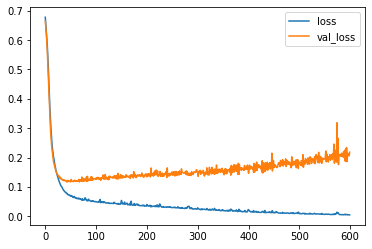

In [47]:
losses.plot()

In [48]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [51]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [52]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6897 - val_loss: 0.6805
Epoch 2/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6676 - val_loss: 0.6616
Epoch 3/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6478 - val_loss: 0.6385
Epoch 4/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6227 - val_loss: 0.6061
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5859 - val_loss: 0.5583
Epoch 6/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5361 - val_loss: 0.5062
Epoch 7/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4844 - val_loss: 0.4519
Epoch 8/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4362 - val_loss: 0.4027
Epoch 9/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3910 - val_loss: 0.3573
Epoch 10/600
426/42

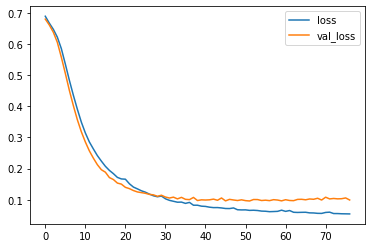

In [53]:
pd.DataFrame(model.history.history).plot()

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [57]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7060 - val_loss: 0.6709
Epoch 2/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6763 - val_loss: 0.6518
Epoch 3/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6659 - val_loss: 0.6292
Epoch 4/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6275 - val_loss: 0.6005
Epoch 5/600
426/426 [==============================] - 0s 92us/sample - loss: 0.6120 - val_loss: 0.5727
Epoch 6/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6032 - val_loss: 0.5488
Epoch 7/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5726 - val_loss: 0.5188
Epoch 8/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5346 - val_loss: 0.4870
Epoch 9/600
426/426 [==============================] - 0s 122us/sample - loss: 0.5185 - val_loss: 0.4553
Epoch 10/600
42

426/426 [==============================] - 0s 94us/sample - loss: 0.1122 - val_loss: 0.0779
Epoch 79/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1169 - val_loss: 0.0966
Epoch 80/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1060 - val_loss: 0.0779
Epoch 81/600
426/426 [==============================] - 0s 92us/sample - loss: 0.1337 - val_loss: 0.0885
Epoch 82/600
426/426 [==============================] - 0s 99us/sample - loss: 0.1149 - val_loss: 0.0830
Epoch 83/600
426/426 [==============================] - 0s 92us/sample - loss: 0.1181 - val_loss: 0.0799
Epoch 84/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0915 - val_loss: 0.0812
Epoch 85/600
426/426 [==============================] - 0s 89us/sample - loss: 0.1115 - val_loss: 0.0730
Epoch 86/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1136 - val_loss: 0.0841
Epoch 87/600
426/426 [==============================] - 0s 89us/sa

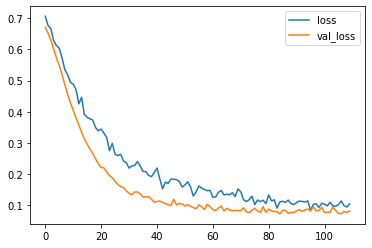

In [58]:
pd.DataFrame(model.history.history).plot()

In [60]:
pred = model.predict_classes(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



[[54  1]
 [ 2 86]]
